In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline
airlines_df = pd.read_csv("Airlines.csv")

source: https://www.kaggle.com/datasets/ulrikthygepedersen/airlines-delay

In [2]:
airlines_df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.00000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.00000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.60446,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.00000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.50000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.00000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.50000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.00000,7814.000000,7.000000,1439.000000,655.000000,1.000000


(Work Functions)

In [3]:
def get_delay_count_by_port(start_port, end_port=None):
    if end_port is None:
        return len(airlines_df[(airlines_df['AirportFrom'] == start_port)&(airlines_df['Delay'] == 1)])

    else:
        return len(airlines_df[((airlines_df['AirportFrom'] == start_port)&(airlines_df['AirportTo'] == end_port))&(airlines_df['Delay'] == 1)])


# Overview

Chart below shows flight data from a week with orange bars showing flights delayed and blue showing total flights

My objective of this project is to find the most unfavorable situation which a person with this data may predict that their flight is delayed

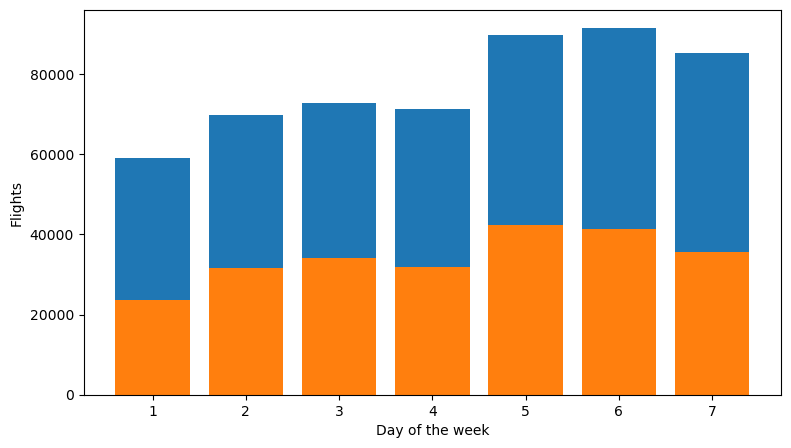

In [4]:
day_df = airlines_df.groupby(['DayOfWeek'])
x_val = airlines_df['DayOfWeek'].unique()
y_valB = day_df['Delay'].sum()
y_valA = day_df['Delay'].count()

plt.figure(figsize=(9,5))
plt.bar(x_val, y_valA)
plt.bar(x_val, y_valB)
plt.xlabel('Day of the week')
plt.ylabel('Flights')
plt.show()

# Unfavorable

## By Airline

Sorting by airline, we can see that some airlines have notably higher delay rates than others

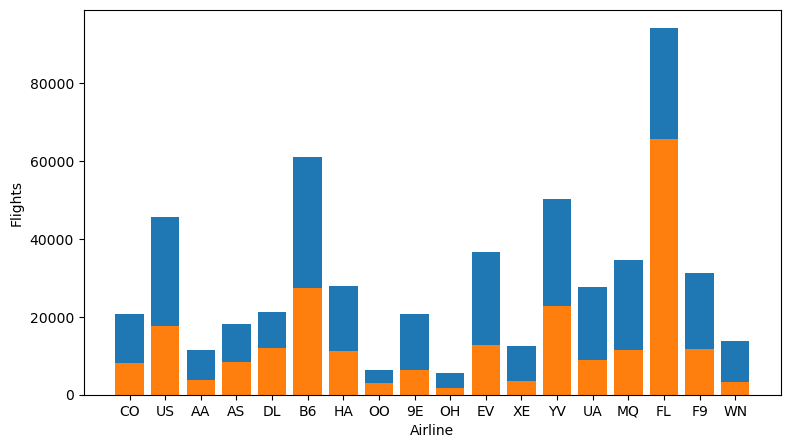

In [5]:
x_val3 = airlines_df['Airline'].unique()
y_val3B = airlines_df.groupby(['Airline'])['Delay'].sum()
y_val3A = airlines_df.groupby(['Airline'])['Delay'].count()

plt.figure(figsize=(9,5))
plt.bar(x_val3, y_val3A)
plt.bar(x_val3, y_val3B)
plt.xlabel('Airline')
plt.ylabel('Flights')
plt.show()

## Specifics - By airline

Using the percentage chart airline code FL has the highest delay rate by a substantial margin

The airlines AS, DL, B6, OO, and YV also have higher delay rates than average

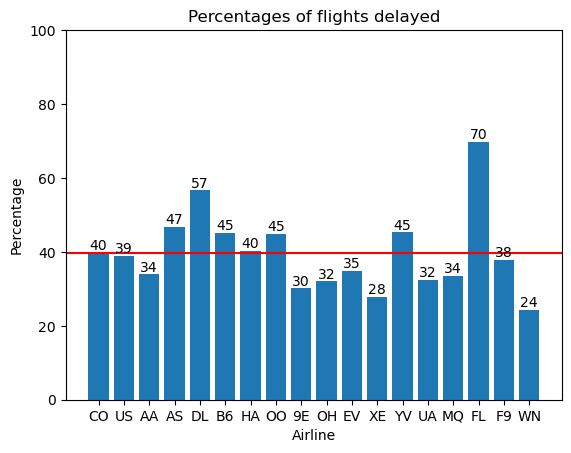

In [6]:
y_result3 = y_val3B.div(y_val3A).multiply(100)
mean_val3 = y_result3.mean()


fig, ax = plt.subplots()
bar_container = ax.bar(x_val3, y_result3)
ax.set(ylabel='Percentage', xlabel='Airline' , title='Percentages of flights delayed', ylim=(0, 100))

mean_line3 = ax.axhline(y=mean_val3, color='red')

ax.bar_label(bar_container, fmt='{:,.0f}')

plt.show()

## By day

Sorting FL flights by day, here are the exact numbers of flights per day and flights delayed by day

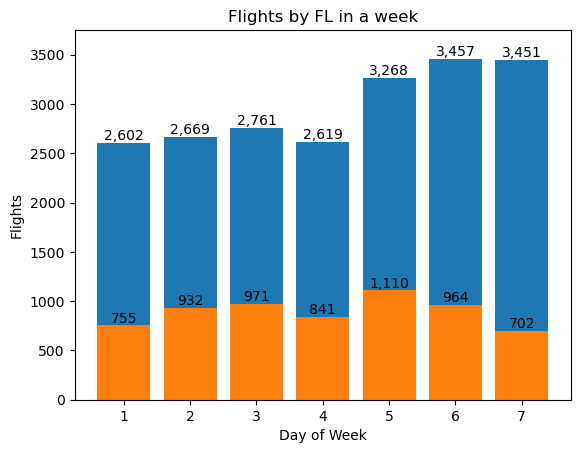

In [7]:
y_result4 = airlines_df[airlines_df['Airline'] == 'FL']
y_result4A = y_result4.groupby(['DayOfWeek'])['Delay'].count()
y_result4B = y_result4.groupby(['DayOfWeek'])['Delay'].sum()
y_result4C = y_result4B.div(y_result4A).multiply(100)

fig, ax = plt.subplots()
bar_container1 = ax.bar(x_val, y_result4A)
bar_container2 = ax.bar(x_val, y_result4B)
ax.set(ylabel='Flights', xlabel='Day of Week' , title='Flights by FL in a week', ylim=(0, 3750))
ax.bar_label(bar_container1, fmt='{:,.0f}')
ax.bar_label(bar_container2, fmt='{:,.0f}')
plt.show()

### Sorting by day II

The percentages shown on the chart below show how on days 2 and 3 flights at delayed the most

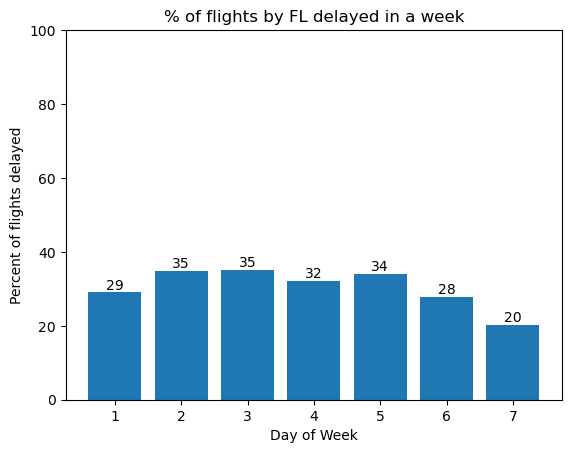

In [8]:
fig, ax = plt.subplots()
bar_container3 = ax.bar(x_val, y_result4C)
ax.set(ylabel='Percent of flights delayed', xlabel='Day of Week' , title='% of flights by FL delayed in a week', ylim=(0, 100))
ax.bar_label(bar_container3, fmt='{:,.0f}')
plt.show()

## Flight Length

Flight length is another measure provided, using the scatter plot and the overall line of best fit, shorter flights are more often delayed than longer flights, although the scatter plot provides more of a hump curve than a straight line down in terms of describing data trends

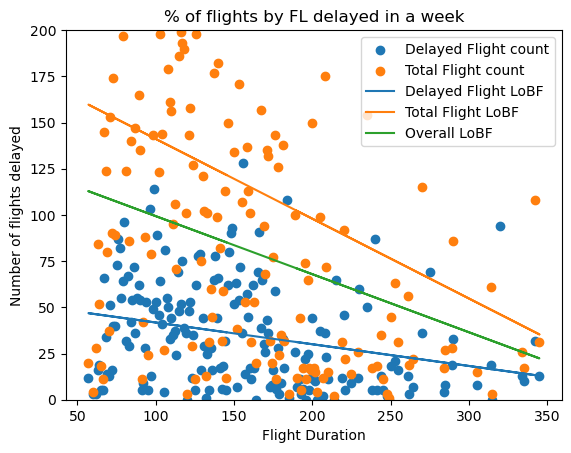

In [9]:
y_result4D = y_result4.groupby(['Length'])['Delay'].sum()
y_result4E = y_result4.groupby(['Length'])['Delay'].count()
x_val2 = y_result4['Length'].unique()

fig, ax = plt.subplots()

a2, b2 = np.polyfit(x_val2, y_result4E, 1)
a, b = np.polyfit(x_val2, y_result4D, 1)
a3 = a2 - a
b3 = b2 - b

delayScatter1 = ax.scatter(x_val2, y_result4D)
totalScatter1 = ax.scatter(x_val2, y_result4E)

ax.set(ylabel='Number of flights delayed', xlabel='Flight Duration' , title='% of flights by FL delayed in a week', ylim=(0, 200))
line1, = ax.plot(x_val2, a*x_val2+b)
line2, = ax.plot(x_val2, a2*x_val2+b2)
line3, = ax.plot(x_val2, a3*x_val2+b3)

delayScatter1.set_label('Delayed Flight count')
totalScatter1.set_label('Total Flight count')

line1.set_label('Delayed Flight LoBF')
line2.set_label('Total Flight LoBF')
line3.set_label('Overall LoBF')

ax.legend()

plt.show()

## By Airport

In [10]:
airport_list_from = sorted(y_result4['AirportFrom'].unique())
airport_list_To = sorted(y_result4['AirportTo'].unique())

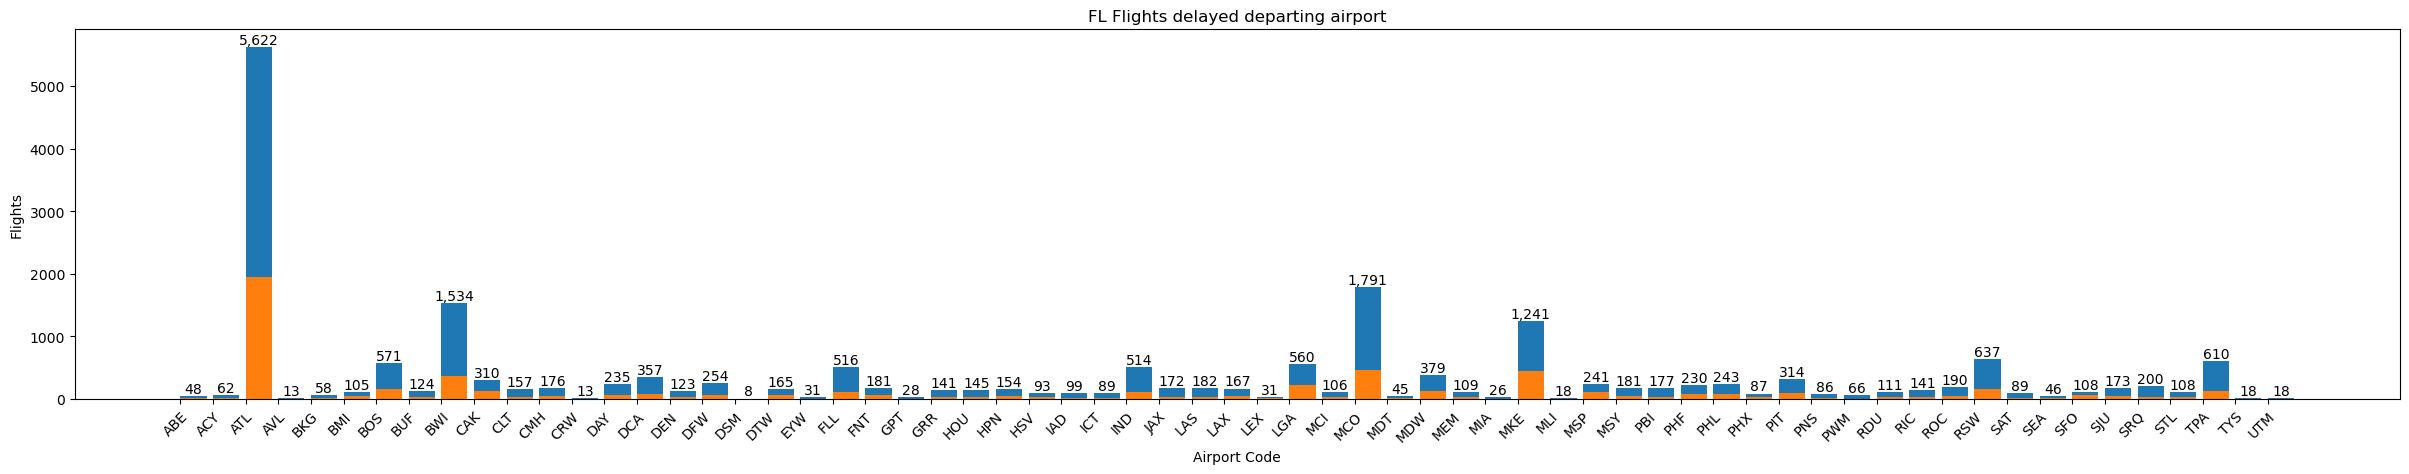

In [11]:
y_result5A = y_result4.groupby(['AirportFrom'])['Delay'].sum()
y_result5B = y_result4.groupby(['AirportFrom'])['Delay'].count()
y_result5C = y_result5A.div(y_result5B).multiply(100)

fig, ax = plt.subplots()

ax.set(ylabel='Flights', xlabel='Airport Code' , title='FL Flights delayed departing airport')

barcontainer_5B = ax.bar(airport_list_from, y_result5B, align='edge')
barcontainer_5A = ax.bar(airport_list_from, y_result5A, align='edge')

ax.bar_label(barcontainer_5B, fmt='{:,.0f}')

fig.set_figwidth(30)

plt.xticks(airport_list_from, rotation=45, horizontalalignment='right', verticalalignment='top', rotation_mode='anchor')

plt.show()

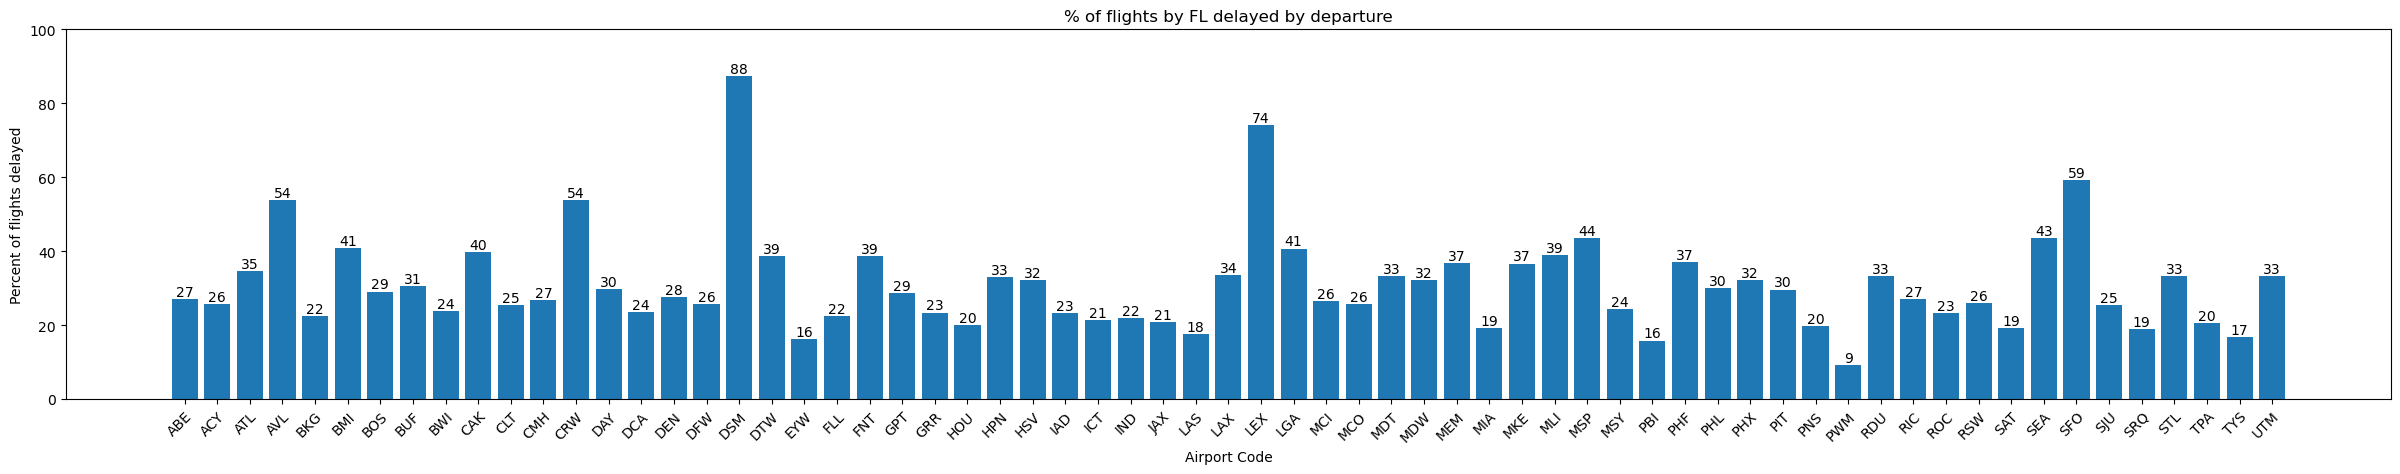

In [12]:
fig, ax = plt.subplots()

barcontainer_5C = ax.bar(airport_list_from, y_result5C)
ax.set(ylabel='Percent of flights delayed', xlabel='Airport Code' , title='% of flights by FL delayed by departure', ylim=(0, 100))

fig.set_figwidth(30)

plt.xticks(airport_list_from, rotation=45, horizontalalignment='right', verticalalignment='top', rotation_mode='anchor')
ax.bar_label(barcontainer_5C, fmt='{:,.0f}')

plt.show()

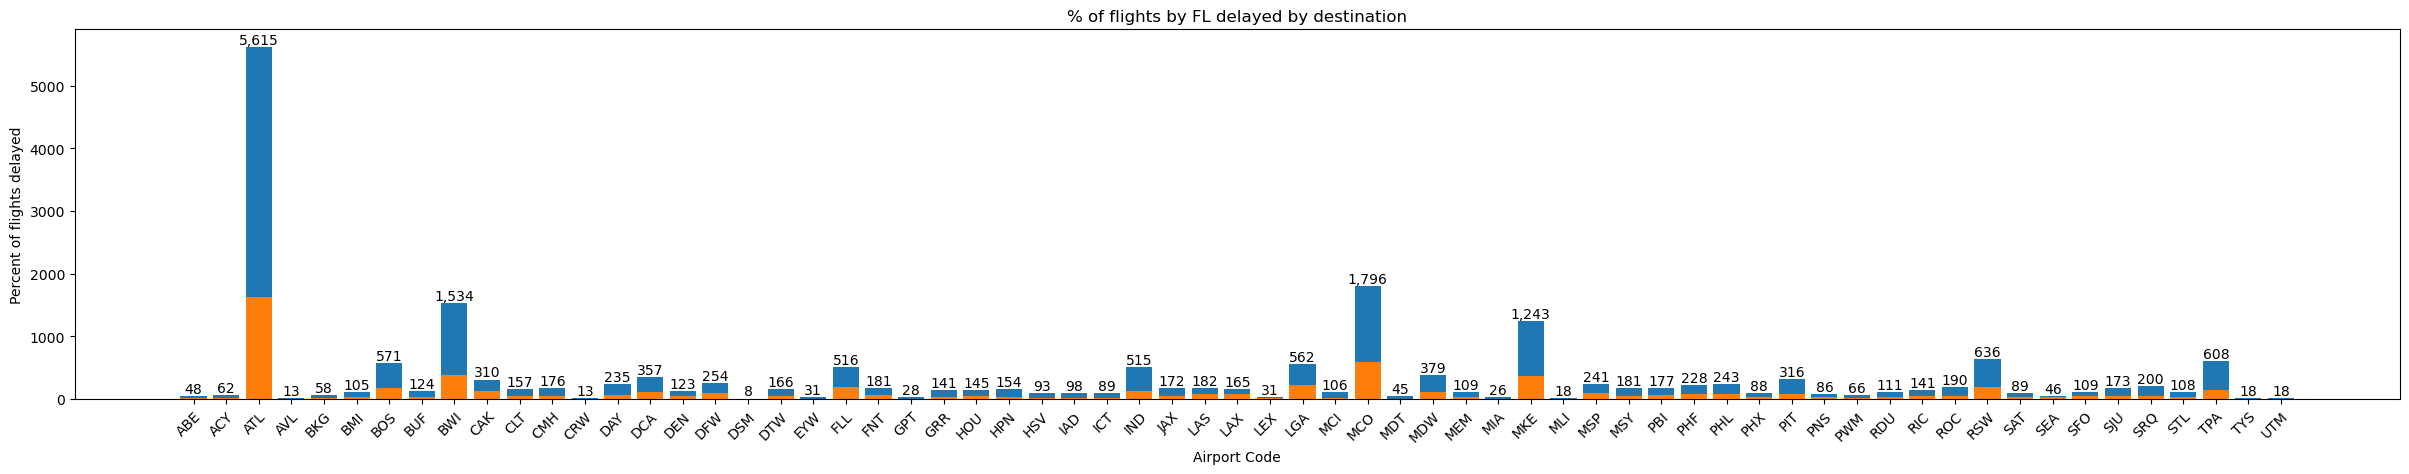

In [13]:
y_result6A = y_result4.groupby(['AirportTo'])['Delay'].sum()
y_result6B = y_result4.groupby(['AirportTo'])['Delay'].count()
y_result6C = y_result6A.div(y_result6B).multiply(100)

fig, ax = plt.subplots()

ax.set(ylabel='Percent of flights delayed', xlabel='Airport Code' , title='% of flights by FL delayed by destination')

barcontainer_6B = ax.bar(airport_list_To, y_result6B)
ax.bar(airport_list_To, y_result6A)
plt.xticks(airport_list_To, rotation=45, horizontalalignment='right', verticalalignment='top', rotation_mode='anchor')

ax.bar_label(barcontainer_6B, fmt='{:,.0f}')

fig.set_figwidth(30)

plt.show()

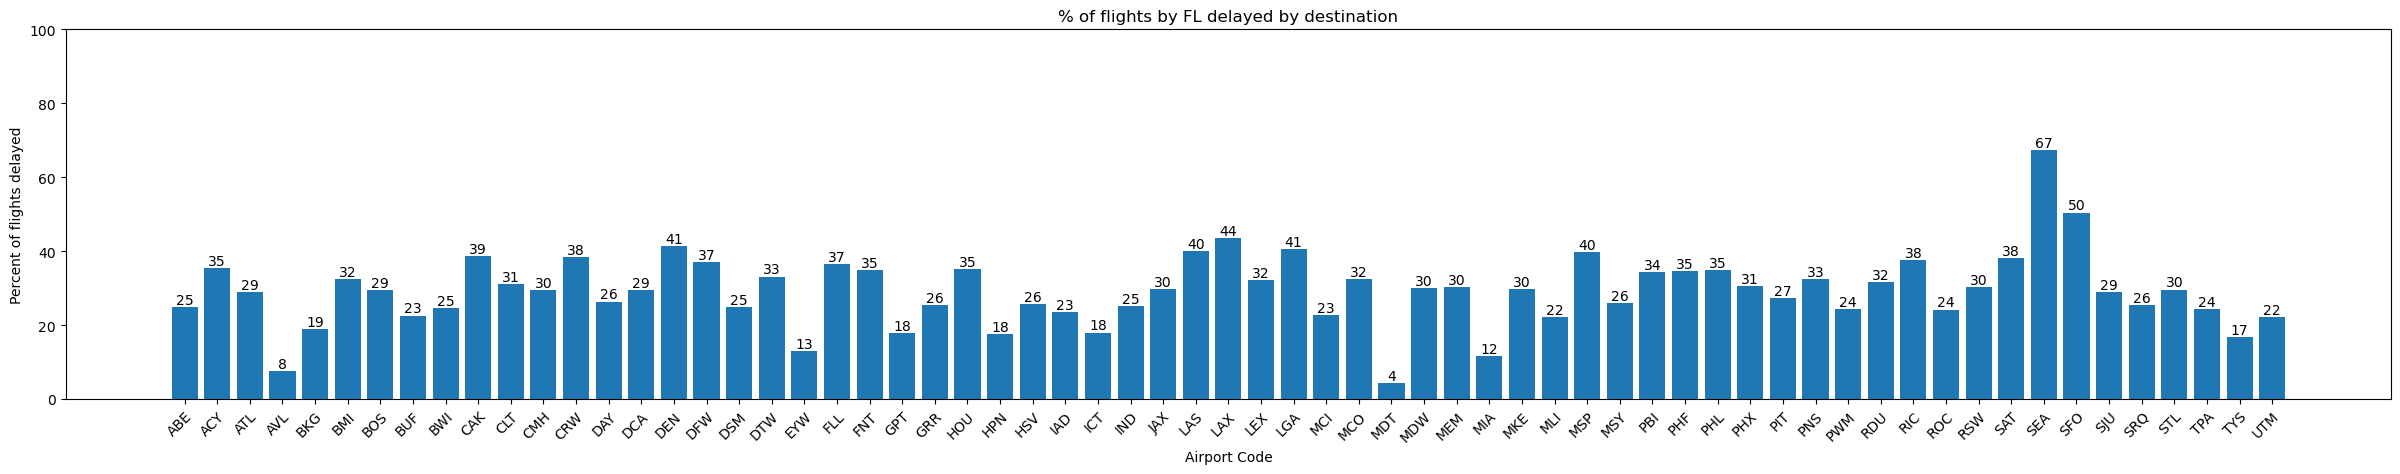

In [14]:
fig, ax = plt.subplots()

barcontainer_6C = ax.bar(airport_list_To, y_result6C)

plt.xticks(airport_list_To, rotation=45, horizontalalignment='right', verticalalignment='top', rotation_mode='anchor')
ax.bar_label(barcontainer_6C, fmt='{:,.0f}')
ax.set(ylabel='Percent of flights delayed', xlabel='Airport Code' , title='% of flights by FL delayed by destination', ylim=(0, 100))

fig.set_figwidth(30)

plt.show()

## Route heatmap

In [15]:
FL_df = airlines_df[airlines_df['Airline']=='FL']

In [16]:
delayed_routes = pd.pivot_table(FL_df, columns='AirportFrom', index='AirportTo', values='Delay', aggfunc="sum")
total_routes = pd.pivot_table(FL_df, columns='AirportFrom', index='AirportTo', values='Delay', aggfunc="count")
percentage_routes = delayed_routes.div(total_routes)
percentage_routes = percentage_routes.multiply(100)
percentage_routes = percentage_routes.round(1)
heatmap_data = percentage_routes.to_numpy()

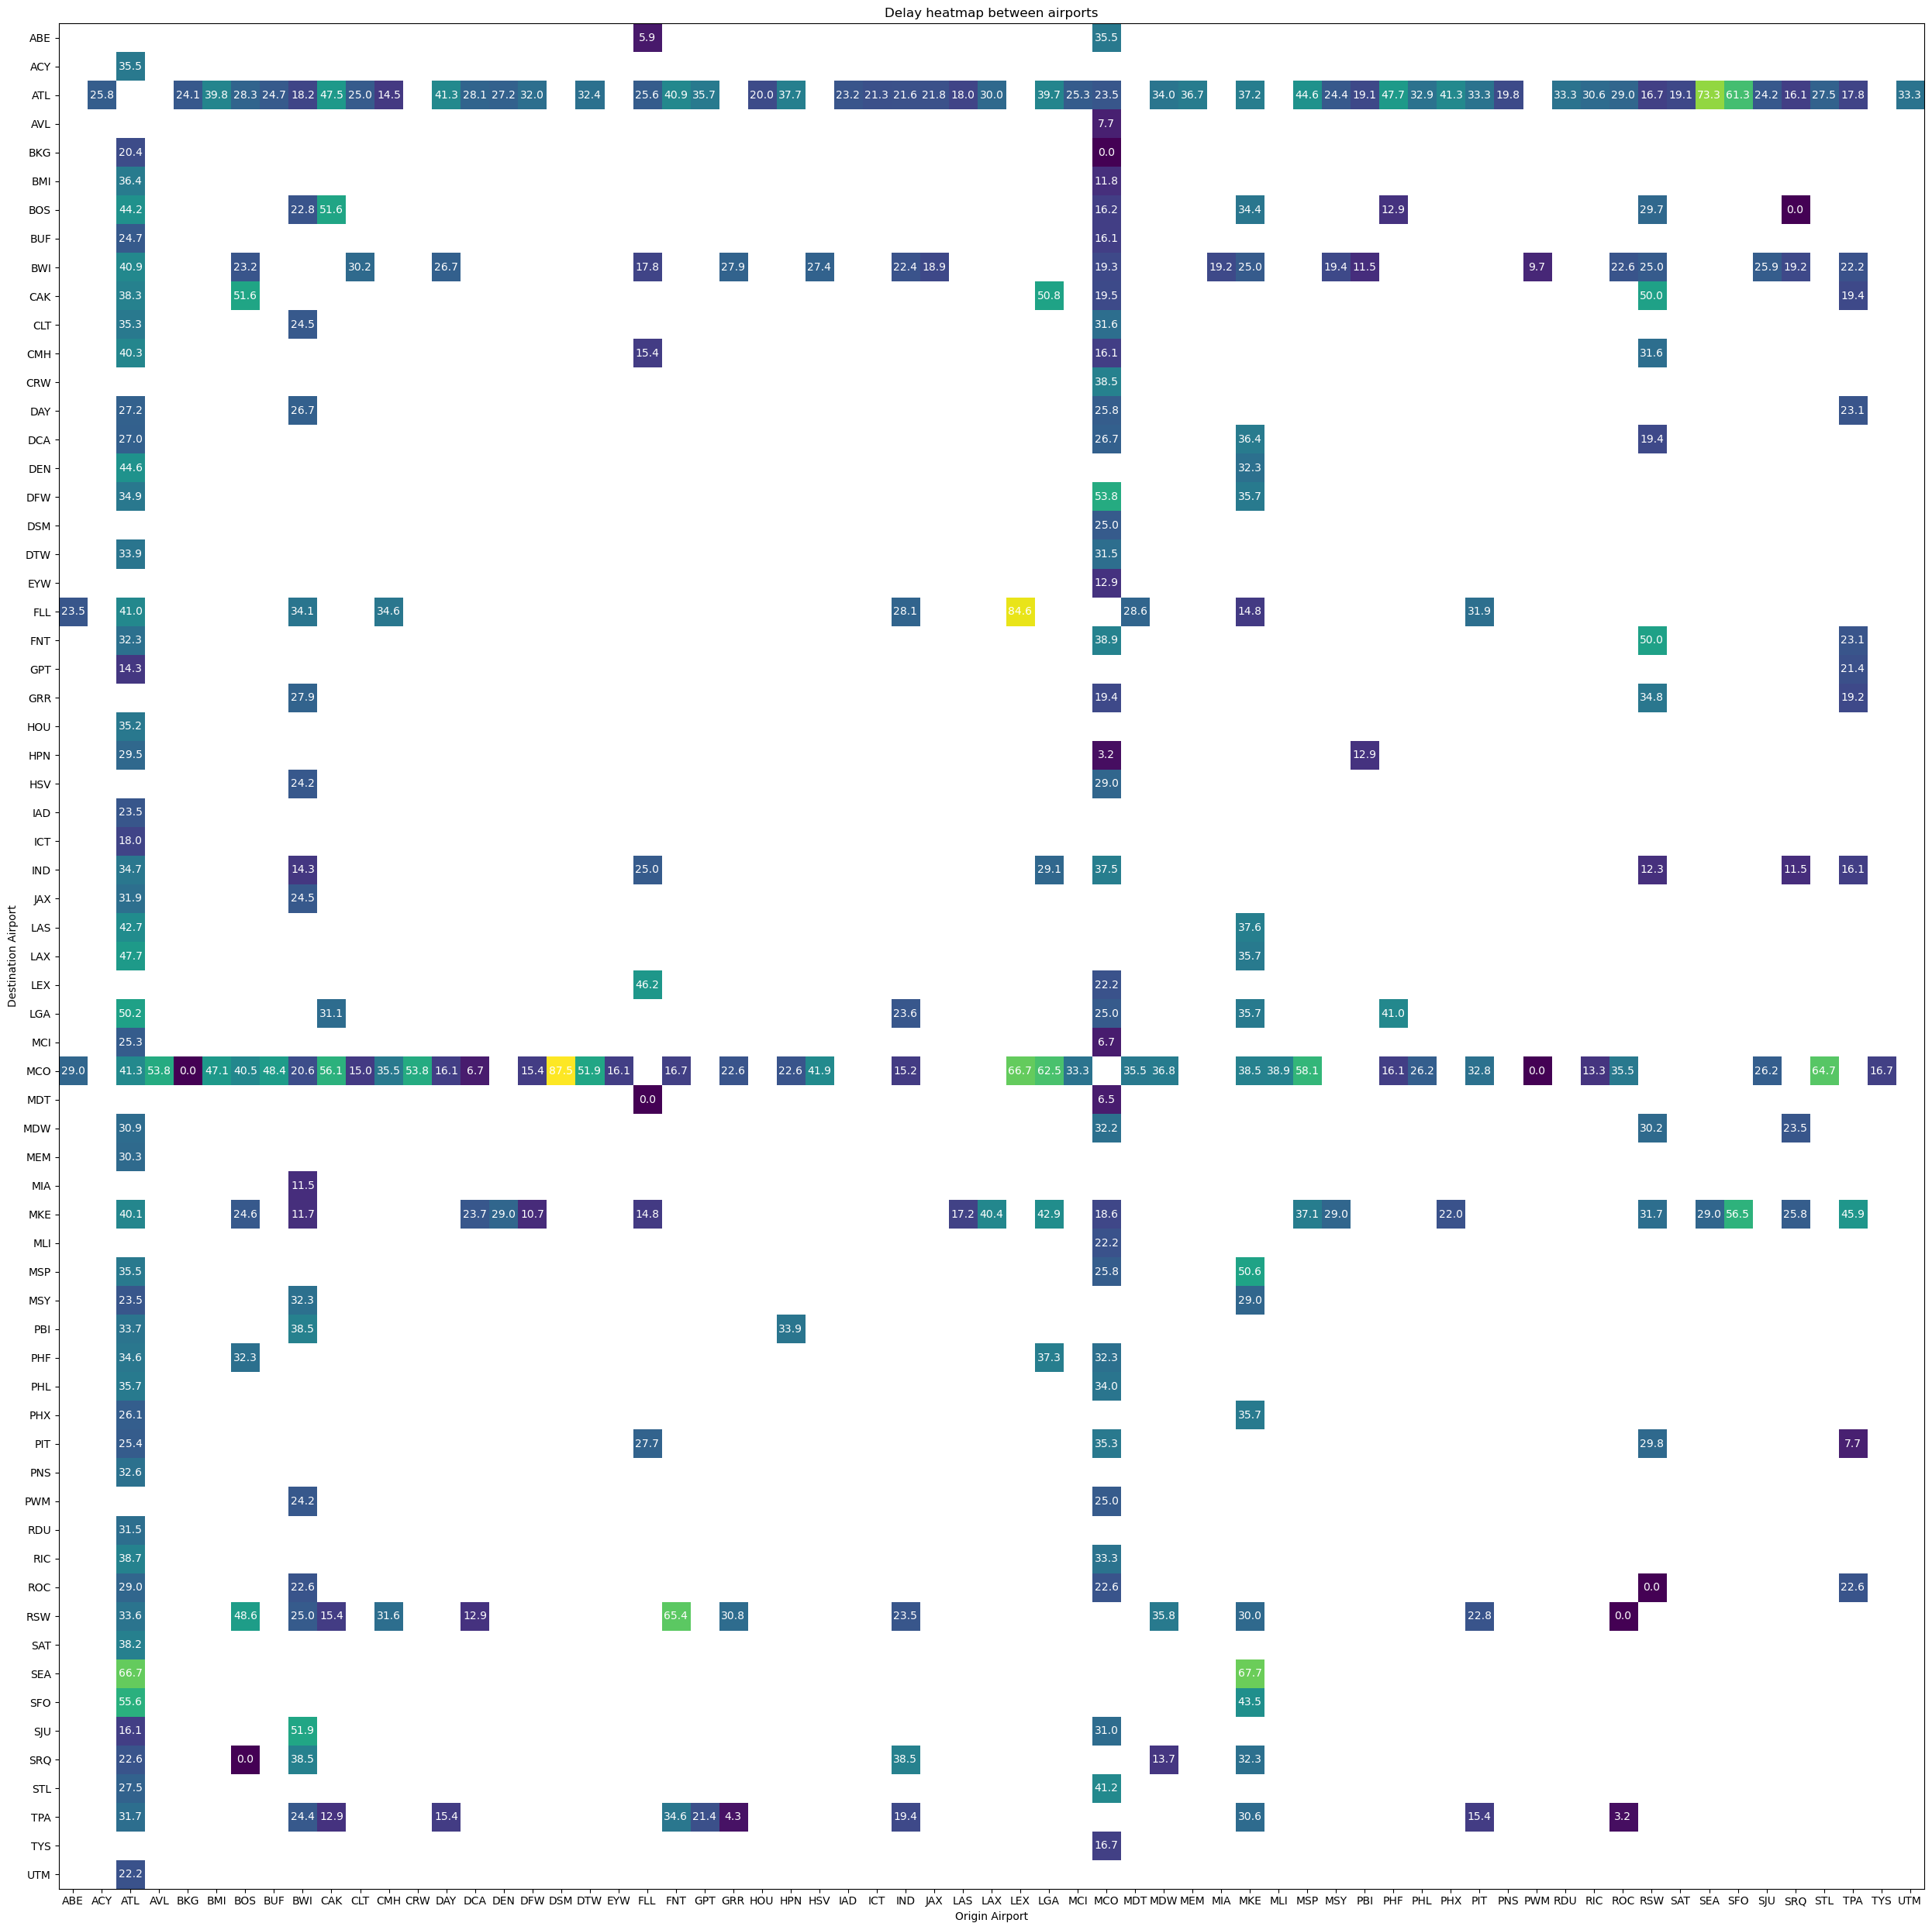

In [17]:
fig, ax = plt.subplots()

origin_data = y_result4.groupby(['AirportFrom'])

im = ax.imshow(heatmap_data)

ax.set_xticks(np.arange(len(airport_list_To)), labels=airport_list_To)
ax.set_yticks(np.arange(len(airport_list_from)), labels=airport_list_from)

#plt.xticks(airport_list_To, rotation=45, horizontalalignment='right', verticalalignment='top', rotation_mode='anchor')

for i in range(len(airport_list_from)):
    for j in range(len(airport_list_To)):
        text = ax.text(j, i, heatmap_data[i][j], ha="center", va="center", color="w")

fig.set_figwidth(25)
fig.set_figheight(25)

ax.set(ylabel='Destination Airport', xlabel='Origin Airport' , title='Delay heatmap between airports')
fig.tight_layout()
plt.show()

## By route

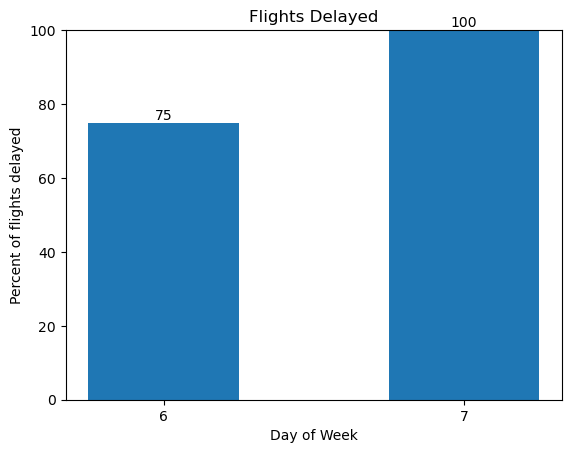

In [38]:
dsm_mco_week = FL_df[(FL_df['AirportFrom']=='DSM')&(FL_df['AirportTo']=='MCO')].groupby(['DayOfWeek'])
dsm_mco_delay_perc = ((dsm_mco_week['Delay'].sum()).divide(dsm_mco_week['Delay'].count())).multiply(100)

x_val3 = dsm_mco_week.groups.keys() 

fig, ax = plt.subplots()
bar_container3 = ax.bar(x_val3, dsm_mco_delay_perc, width=0.5)
ax.set(ylabel='Percent of flights delayed', xlabel='Day of Week' , title='Flights Delayed', ylim=(0, 100))
ax.bar_label(bar_container3, fmt='{:,.0f}')

ax.set_xticks(list(x_val3))

plt.show()


[6, 7]